In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("/content/drive/MyDrive/datasets/imdb reviews/IMDB Dataset.csv")

In [18]:
df.shape

(50000, 2)

In [13]:
df.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [14]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [15]:
df.duplicated().sum()

418

In [21]:
df.drop_duplicates(keep='first',inplace=True)

In [22]:
df.shape

(49582, 2)

<Axes: ylabel='sentiment'>

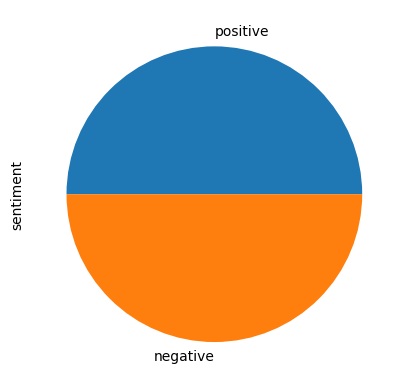

In [16]:
df['sentiment'].value_counts().plot(kind='pie')

In [24]:
df["review"]=df["review"].str.lower()

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
exclude=string.punctuation
def remove_punc(text):
  for char in exclude:
    text=text.replace(char,'')
  return text

In [27]:
df["review"]=df["review"].apply(remove_punc)

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [30]:
def remove_stopwords(text):
  new_text=[]
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x=new_text[:]
  new_text.clear()
  return " ".join(x)

In [31]:
df["review"]=df["review"].apply(remove_stopwords)

In [32]:
df.shape

(49582, 2)

In [33]:
df.head(2)

,review,sentiment
0,one reviewers mentioned watching 1 oz e...,positive
1,wonderful little production br br filming te...,positive


In [34]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [35]:
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [36]:
df["review"]=df["review"].apply(stem_words)

In [40]:
df.shape

(49582, 3)

In [41]:
df.head(2)

,review,sentiment,total_characters
0,one review mention watch 1 oz episod youll hoo...,positive,1059
1,wonder littl product br br film techniqu unass...,positive,584


In [37]:
df["total_characters"]=df["review"].apply(len)

In [38]:
df.head(2)

,review,sentiment,total_characters
0,one review mention watch 1 oz episod youll hoo...,positive,1059
1,wonder littl product br br film techniqu unass...,positive,584


In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
df["total_words"]=df["review"].apply(lambda x:len(nltk.word_tokenize(x)))

In [44]:
df.head(2)

,review,sentiment,total_characters,total_words
0,one review mention watch 1 oz episod youll hoo...,positive,1059,171
1,wonder littl product br br film techniqu unass...,positive,584,90


In [46]:
df["total_sentences"]=df["review"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [47]:
df.head(2)

,review,sentiment,total_characters,total_words,total_sentences
0,one review mention watch 1 oz episod youll hoo...,positive,1059,171,1
1,wonder littl product br br film techniqu unass...,positive,584,90,1


In [48]:
df[['total_characters','total_words','total_sentences']].describe()

,total_characters,total_words,total_sentences
count,49582.000000,49582.000000,49582.0
mean,753.393369,123.016337,1.0
std,578.354173,92.592307,0.0
min,17.000000,3.000000,1.0
25%,395.000000,66.000000,1.0
50%,555.000000,91.000000,1.0
75%,918.000000,150.000000,1.0
max,8443.000000,1449.000000,1.0


In [54]:
mask_positive=df["sentiment"]=='positive'
mask_negative=df["sentiment"]=='negative'

In [55]:
df[mask_positive][['total_characters','total_words','total_sentences']].describe()

,total_characters,total_words,total_sentences
count,24884.000000,24884.000000,24884.0
mean,766.697918,124.265874,1.0
std,606.390539,96.341739,0.0
min,31.000000,6.000000,1.0
25%,392.000000,65.000000,1.0
50%,555.000000,91.000000,1.0
75%,938.000000,152.000000,1.0
max,8443.000000,1449.000000,1.0


In [56]:
df[mask_negative][['total_characters','total_words','total_sentences']].describe()

,total_characters,total_words,total_sentences
count,24698.000000,24698.000000,24698.0
mean,739.988623,121.757389,1.0
std,548.345651,88.638557,0.0
min,17.000000,3.000000,1.0
25%,399.000000,67.000000,1.0
50%,555.000000,92.000000,1.0
75%,899.000000,148.000000,1.0
max,5294.000000,854.000000,1.0


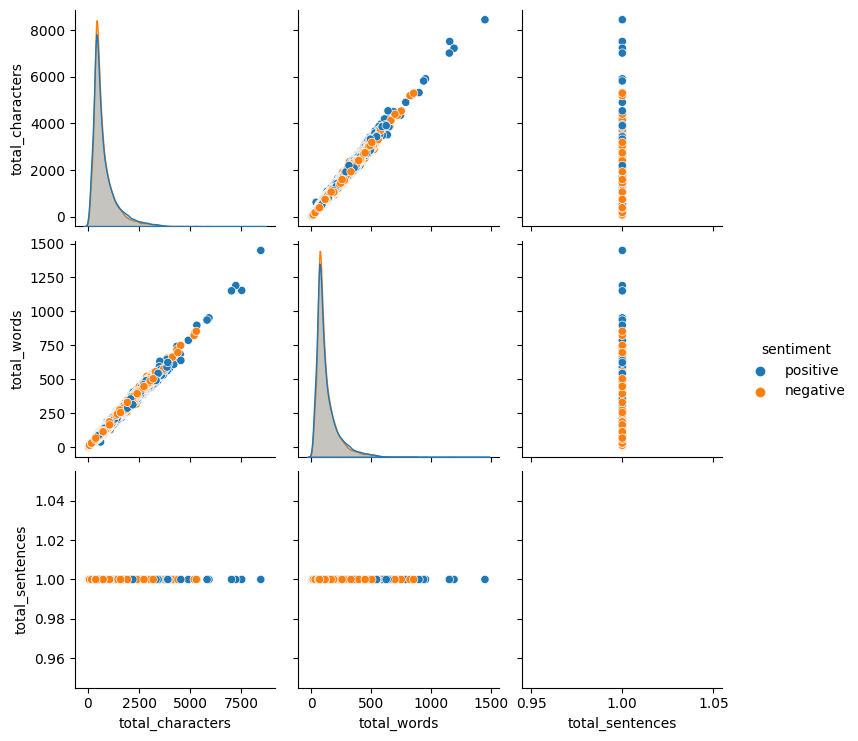

In [57]:
sns.pairplot(df,hue='sentiment')

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import pickle

In [63]:
le = LabelEncoder()

In [64]:
df['sentiment'] = le.fit_transform(df['sentiment'])

In [59]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True,max_features=10000)

In [67]:
x = vectorizer.fit_transform(df['review'])
y = df['sentiment']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [69]:
lr=LogisticRegression()

In [70]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
accuracy_score(y_test,lr.predict(x_test))*100

88.79701522637895

In [73]:
cv_scores = cross_val_score(lr, x_train, y_train, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
print(np.mean(cv_scores)*100)

89.07601159712593


In [77]:
pickle.dump(vectorizer,open('npl_vectorizer.pkl','wb'))

In [78]:
pickle.dump(lr,open('reviews_model.pkl','wb'))